# Gradient Descent with the Breast Cancer Dataset
This example demonstrates how to use gradient descent to classify tumors as malignant or benign. The goal is to minimize the cost function to find the optimal weights for the linear model.



# Import Necessary Libraries
Here, we import the required Python libraries for data manipulation, visualization, and machine learning.

In [8]:
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Loading the "Advertising" Dataset

In [9]:
# Load breast cancer dataset
data = load_breast_cancer()


# Data Splitting and Normalization
The dataset is split into features and labels, then further into training and test sets. We normalize the data for consistency.

In [10]:
# Separate labels and features
X = data.data
y = data.target

# Normalize the features 
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)

# Add a column of ones for the bias term
X_norm = np.hstack((np.ones((X_norm.shape[0], 1)), X_norm))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)




# Define the Cost Function and Gradient Descent
The cost function calculates the mean squared error between the predicted output and the true output. Gradient descent iterates over the data to update the model parameters.

In [11]:
# Define the cost function
def loss(X, y, w):
    m = len(y)
    h = X @ w
    J = (1/(2*m)) * np.sum((h - y)**2)
    return J

# Define the gradient descent function
def gradient_descent(X, y, w, learning_rate, epochs):
    m = len(y)
    loss_history = np.zeros(epochs)
    for i in range(epochs):
        h = X @ w
        w = w - (learning_rate/m) * (X.T @ (h - y))
        loss_history[i] = loss(X, y, w)
    return w, loss_history

# Define the prediction function
def predict(X, w):
    z = abs(np.round(np.dot(X, w)))
    return z



# Train the Model Using Gradient Descent
We set the learning rate, initialize weights, and perform gradient descent to update the model's parameters.

In [12]:
# Initialize the parameters and hyperparameters
w = np.zeros(X_norm.shape[1])
learning_rate = 0.1
epochs = 1000

# Run gradient descent on the training set
w, loss_history = gradient_descent(X_train, y_train, w, learning_rate, epochs)


# Plot the Cost Function over Iterations
This plot visualizes the convergence of the gradient descent algorithm by displaying the reduction in cost over time.

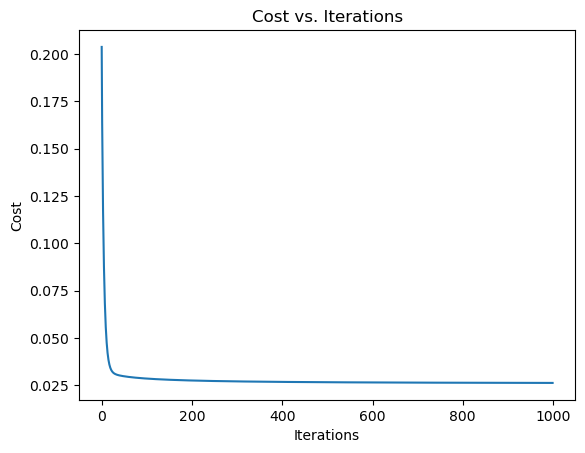

In [13]:
# Plot the cost function over iterations
plt.plot(range(epochs), loss_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()


# Model Evaluation
We evaluate the accuracy of the model on the test set, and plot the confusion matrix to understand the performance in classifying tumors.

Testing Accuracy: 95.61%


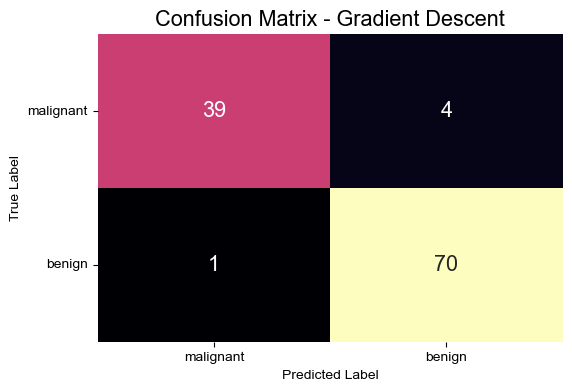

In [14]:
# Evaluate the model on the test set
y_pred = predict(X_test, w)
accuracy = accuracy_score(y_test, y_pred)
print('Testing Accuracy: {:.2f}%'.format(accuracy * 100))

# Create a confusion matrix
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
ax = plt.axes()
sns.set(font_scale=1.3)
sns.heatmap(matrix_df,
            annot = True,
            fmt = "g",
            ax = ax,
            cmap = "magma",
            cbar = False)
ax.set_title("Confusion Matrix - Gradient Descent")
ax.set_xlabel("Predicted Label")
ax.set_xticklabels(["malignant", "benign"])
ax.set_ylabel("True Label")
ax.set_yticklabels(["malignant", "benign"], rotation=0)
plt.show()


# Generate a Classification Report
The classification report provides a summary of the precision, recall, and F1-score for each class.

In [15]:
# Generate a classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



#### Conclusion
The model evaluation shows that gradient descent is capable of predicting the type of tumor with a high accuracy. A summary of the results obtained is:
1. The gradient descent is able to achieve a testing accuracy of 96%.
2. The precision of the gradient descent is 97% for malignant and 95% for benign tumors.
